In [2]:
import scipy.signal as sp
import numpy as np
import pandas as pd

In [3]:
import scipy.fftpack
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [4]:
np.fft

<module 'numpy.fft' from '/home/swathi/anaconda3/lib/python3.6/site-packages/numpy/fft/__init__.py'>

In [5]:
dataset = pd.read_excel("three.xlsx")

In [6]:
dataset.head(5)

,logDeltaMs,Time (sec),AdultF_uH,AdultM1_uH
0,50.008287,0.050008,8.277837,8.278923
1,51.978892,0.101987,8.277797,8.278915
2,51.006894,0.152994,8.277790,8.278915
3,50.014369,0.203008,8.277814,8.278915
4,52.048456,0.255057,8.277814,8.278938


In [7]:
dataset.shape

(1110, 4)

In [8]:
dataset.describe()

,logDeltaMs,Time (sec),AdultF_uH,AdultM1_uH
count,1110.000000,1110.000000,1110.000000,1110.000000
mean,55.155879,30.883319,8.277982,8.279474
std,8.385892,17.671118,0.000130,0.000261
min,50.001825,0.050008,8.277725,8.278915
25%,51.006039,15.700297,8.277871,8.279194
50%,52.081528,30.802000,8.277998,8.279602
75%,55.287278,46.400087,8.278093,8.279681
max,119.265326,61.223026,8.278253,8.279768


In [9]:
dataset.columns = ['Delta', 'Time', 'A_F', 'A_M'] 

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 4 columns):
Delta    1110 non-null float64
Time     1110 non-null float64
A_F      1110 non-null float64
A_M      1110 non-null float64
dtypes: float64(4)
memory usage: 34.8 KB


In [11]:
dataset.head()

,Delta,Time,A_F,A_M
0,50.008287,0.050008,8.277837,8.278923
1,51.978892,0.101987,8.277797,8.278915
2,51.006894,0.152994,8.277790,8.278915
3,50.014369,0.203008,8.277814,8.278915
4,52.048456,0.255057,8.277814,8.278938


In [12]:
def remove_outliers(dataset, m=2):
    return dataset[abs(dataset - np.mean(dataset)) < m * np.std(dataset)]

In [13]:
remove_outliers(dataset, 2)
#dataset.boxplot()


,Delta,Time,A_F,A_M
0,50.008287,0.050008,8.277837,NaN
1,51.978892,0.101987,8.277797,NaN
2,51.006894,0.152994,8.277790,NaN
3,50.014369,0.203008,8.277814,NaN
4,52.048456,0.255057,8.277814,NaN
5,50.942651,0.306000,8.277822,NaN
6,50.023113,0.356023,8.277822,8.278954
7,50.970021,0.406993,8.277797,8.278971
8,50.054663,0.457047,8.277806,8.278971
9,51.966347,0.509014,8.277797,8.278987


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdff6b9f588>,
      dtype=object)

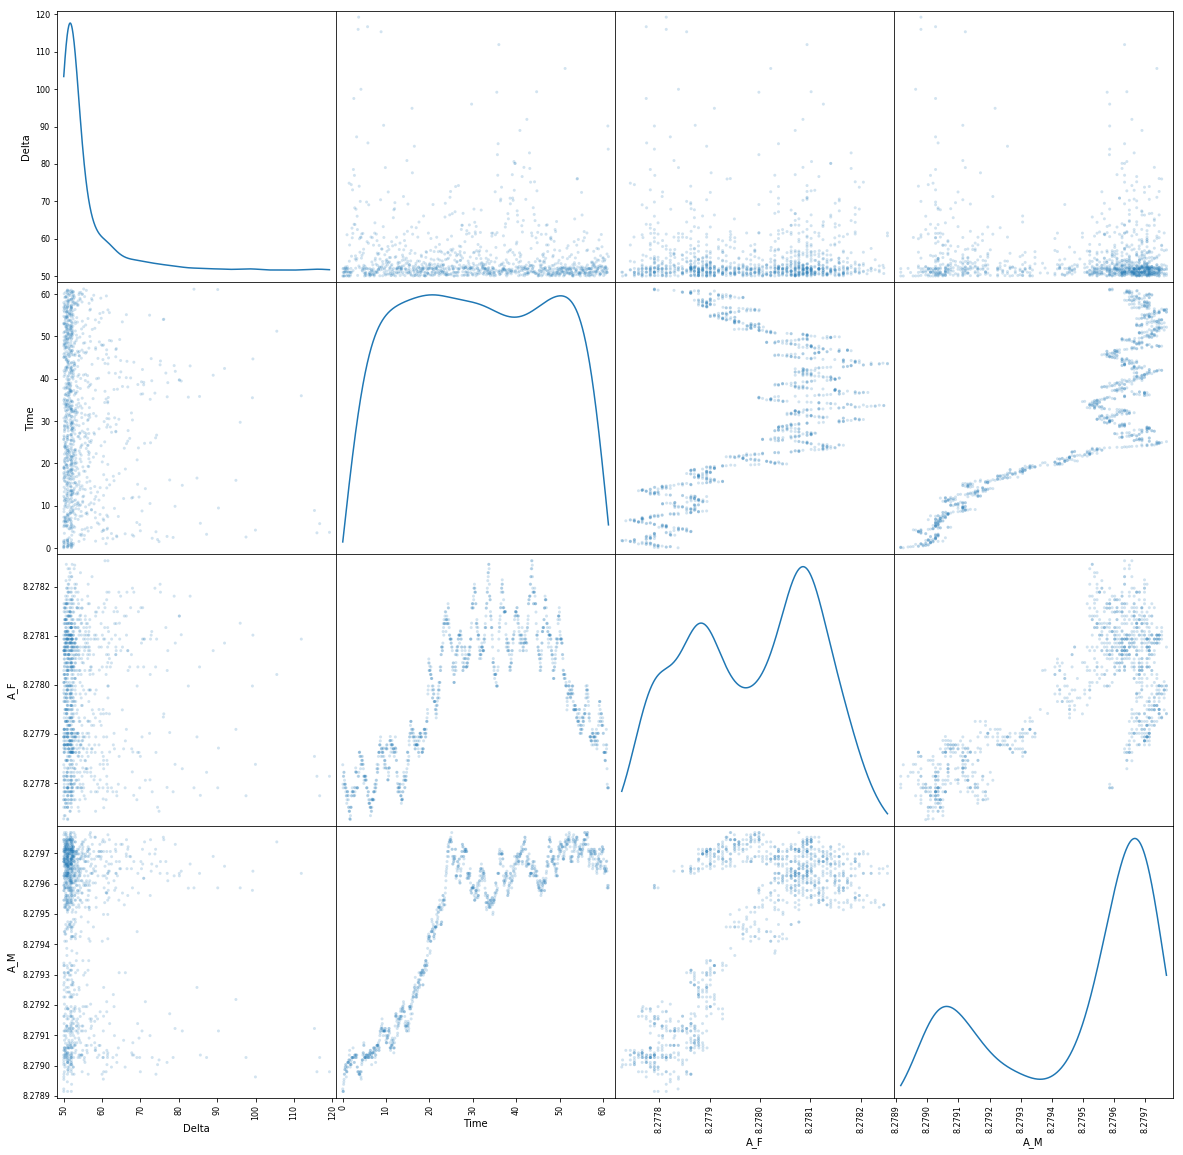

In [63]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, alpha=0.2, figsize=(20, 20), diagonal='kde')

In [22]:
signalFemale = dataset['A_F']
signalMale = dataset['A_M']

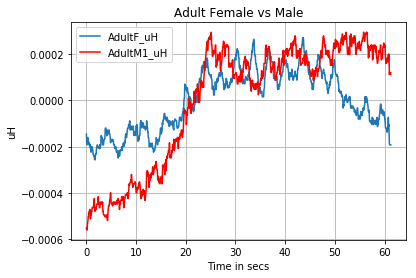

In [70]:
import matplotlib.pyplot as plt
plt.title('Adult Female vs Male')
plt.xlabel('Time in secs')
plt.ylabel('uH')
plt.plot(time, signalFemale, label = 'AdultF_uH')
plt.plot(time, signalMale, label = 'AdultM1_uH', color = 'red')
plt.grid()
plt.legend()
plt.show()

In [23]:
mean_removed_female = np.ones_like(signalFemale)*np.mean(signalFemale)
signalFemale = signalFemale - mean_removed_female

mean_removed_male = np.ones_like(signalMale)*np.mean(signalMale)
signalMale = signalMale - mean_removed_male

In [65]:
from scipy.fftpack import fft

def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values

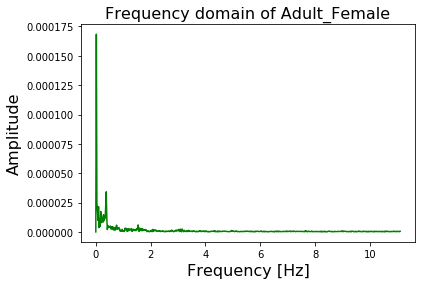

In [66]:
t_n = 50
N = 1110
T = t_n / N
f_s = 1/T

f_values, fft_values = get_fft_values(signalFemale, T, N, f_s)

plt.plot(f_values, fft_values, linestyle='-', color='green')
plt.xlabel('Frequency [Hz]', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title("Frequency domain of Adult_Female", fontsize=16)
plt.show()

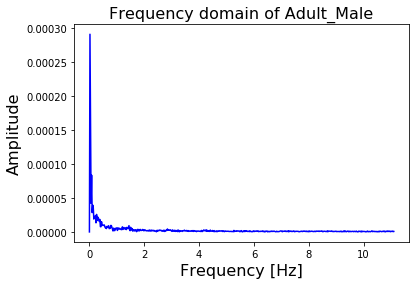

In [69]:
t_n = 50
N = 1110
T = t_n / N
f_s = 1/T

f_values, fft_values = get_fft_values(signalMale, T, N, f_s)

plt.plot(f_values, fft_values, linestyle='-', color='blue')
plt.xlabel('Frequency [Hz]', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title("Frequency domain of Adult_Male", fontsize=16)
plt.show()